# Initial Setup

In [ ]:
!apt install tree
!pip install scikeras
!pip install keras-tuner

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (148 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tree -d "/content/drive/My Drive/Thesis/partitioned_dataset"

/content/drive/My Drive/Thesis/partitioned_dataset
├── test_30
│   ├── Emergency_Vehicle
│   ├── Explosion
│   ├── Gunshot
│   ├── Other_(Music,Bell,Speech,Silence,Sneeze)
│   └── Power_Tool
└── train_70
    ├── Emergency_Vehicle
    ├── Explosion
    ├── Gunshot
    ├── Other_(Music,Bell,Speech,Silence,Sneeze)
    └── Power_Tool

12 directories


# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

# Data Processing

In [ ]:
train_dir = "/content/drive/My Drive/Thesis/partitioned_dataset/train_70"
test_dir = "/content/drive/My Drive/Thesis/partitioned_dataset/test_30"

In [ ]:
# to make all features equally important
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch = 100
# steps_per_epoch = len(X_train)//batch_size

# validation_steps = len(X_test)//batch_size # if you have validation data

In [ ]:
# train_generator = train_datagen.flow_from_directory(
#         train_dir, # el directorio donde están las imágenes de train
#         target_size= (150, 150), # se hace un reescalado (no tienen el mismo tamaño)
#         batch_size= batch, # Cuántas imágenes se toman en iteración
#         class_mode='categorical') # Clasificacón binaria, cada carpeta dentro de train_dir
#                              # es una clase.

# test_generator = test_datagen.flow_from_directory(
#         test_dir,
#         target_size= (150, 150),
#         batch_size= batch,
#         class_mode='categorical')


# Transfer Learning Model Definition

In [ ]:
# Pre-trained model
base_model = tf.keras.applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_model.summary()

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 150, 150, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 150, 150, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 150, 150, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 151, 151, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 75, 75, 64)     │          1,728 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 75, 75, 64)     │            256 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 75, 75, 64)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 75, 75, 64)     │            576 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 75, 75, 64)     │            256 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 75, 75, 64)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 64)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 64)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 16)       │          1,040 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 64,097,687 (244.51 MB)

 Trainable params: 63,786,960 (243.33 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [ ]:
base_model.trainable = False
model = keras.Sequential([
    base_model,
    keras.layers.AveragePooling2D(pool_size=(7, 7), strides=(7,7), padding="same"), # Procesar todas las imágenes como vectores hasta este punto, una matriz numérica donde cada fila es una imagen, se guarda en una estructura como matriz de numpy (ejemplo).
])

In [ ]:
def feature_extraction(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    features = model.predict(img_array)
    return features

In [ ]:
import os

def get_png_paths(root_dir):
    png_paths = []
    for dirpath, _, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.lower().endswith('.png'):
                png_paths.append(os.path.abspath(os.path.join(dirpath, filename)))
    return png_paths

root_directory = "/content/drive/My Drive/Thesis/partitioned_dataset"
png_paths = get_png_paths(root_directory)

print(len(png_paths))
print(png_paths[0].split('/')[-2])

4974
Emergency_Vehicle


In [ ]:
features = []
indexToLabel = dict()
i = 0
for img_path in png_paths:
    features.append(feature_extraction(img_path, model).flatten())
    indexToLabel[i] = img_path.split('/')[-2]
    i += 1

print(len(features))
print(len(features[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

In [ ]:
import csv
save_path = "/content/drive/My Drive/Thesis/"

# Save the array using numpy.save()
np.save(save_path + '/resulting_array_efficient_net.npy', features)

with open(save_path + '/indexToLabel_efficient_net.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Key', 'Value'])  # Write header

    for key, value in indexToLabel.items():
        csv_writer.writerow([key, value])


In [ ]:
print(len(features))
print(len(features[0]))
print(features[0])

4974
2560
[-0.18912159  0.46419364  0.19906108 ... -0.02647827  0.04806016
 -0.14322104]


# *Load* the Data

In [ ]:
import numpy as np
import pandas as pd

# Load features
features = np.load("/content/drive/My Drive/Thesis/resulting_array_efficient_net.npy")

# Load labels
label_df = pd.read_csv("/content/drive/My Drive/Thesis/indexToLabel_efficient_net.csv")
labels = label_df["Value"].to_numpy()
# Convert string labels to integers
label_mapping = {label: index for index, label in enumerate(np.unique(labels))}
print(np.unique(labels))
labels = np.array([label_mapping[label] for label in labels])

# One-hot encode the integer labels
num_classes = len(np.unique(labels))
labels = tf.keras.utils.to_categorical(labels, num_classes)

print(labels)
print(labels.shape)
print(features.shape)
print(num_classes)

['Emergency_Vehicle' 'Explosion' 'Gunshot'
 'Other_(Music,Bell,Speech,Silence,Sneeze)' 'Power_Tool']
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
(4974, 5)
(4974, 2560)
5


Split the data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)


model architecture

In [ ]:
# # Build your model on top of the extracted features

# model = tf.keras.Sequential([
#     # Replace with your desired layers here
#     keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.L2(0.5)),
#     keras.layers.Dropout(0.1),
#     keras.layers.Dense(num_classes, activation="softmax")
# ])
# opt = keras.optimizers.Adam(learning_rate=0.0001)
# # Compile the model with an optimizer and loss function
# model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy()])


In [ ]:
model = tf.keras.Sequential([
    # Replace with your desired layers here
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.L2(0.0005)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation="softmax")
])
opt = keras.optimizers.Adam(learning_rate=0.0001)
# Compile the model with an optimizer and loss function
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy()])

Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=128)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - categorical_accuracy: 0.3648 - loss: 1.8828 - val_categorical_accuracy: 0.5869 - val_loss: 1.4927
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.5925 - loss: 1.4759 - val_categorical_accuracy: 0.6563 - val_loss: 1.3551
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.6506 - loss: 1.3294 - val_categorical_accuracy: 0.6784 - val_loss: 1.2913
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.6581 - loss: 1.2883 - val_categorical_accuracy: 0.6905 - val_loss: 1.2504
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.6920 - loss: 1.2281 - val_categorical_accuracy: 0.7116 - val_loss: 1.2053
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.7118 - loss: 1.1741 - val_categorical_accuracy: 0.7075 - val_loss: 1.1897
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.7041 - loss: 1.1698 - 

Evaluate the model

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.7444 - loss: 0.9614
Validation categorical accuracy: 0.7507537603378296


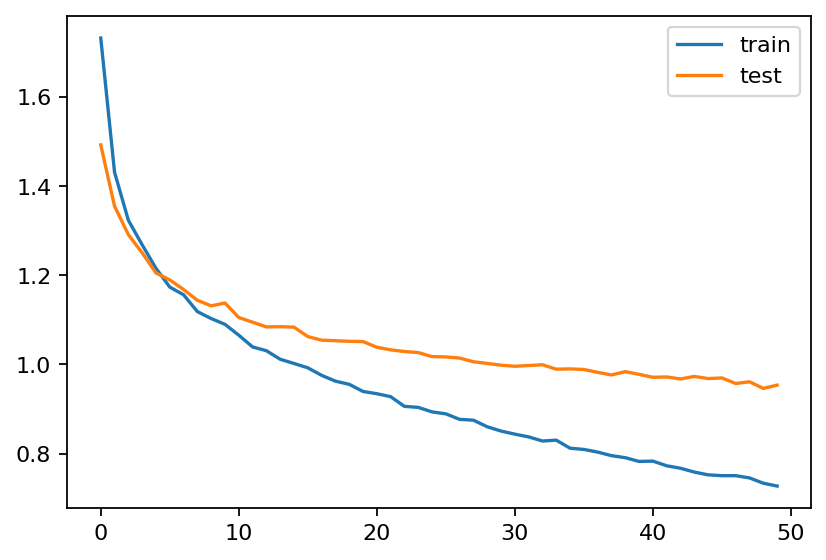

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation categorical accuracy:", accuracy)
plt.figure(figsize=(6, 4), dpi=160)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()


In [ ]:
# https://www.youtube.com/watch?v=6Nf1x7qThR8
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import L2
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
import keras_tuner as kt

# Function to create model
def model_builder(params):
    model = Sequential()

    param_learning_rate = params.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
    param_l2_reg = params.Choice('kernel_regularizer', values=[0.5, 0.05, 0.005, 0.0005])
    param_dropout = params.Choice('dropout_rate', values=[0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.005])
    param_batch_size = params.Choice('batch_size', values=[16, 32, 64, 128])

    model.add(Dense(512, activation="relu", kernel_regularizer=L2(param_l2_reg)))
    model.add(Dropout(param_dropout))
    model.add(Dense(num_classes, activation="softmax"))

    opt = keras.optimizers.Adam(learning_rate=param_learning_rate)

    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy()])

    return model

# Creating the tuner
tuner = kt.RandomSearch(
    model_builder,
    objective=kt.Objective('val_categorical_accuracy', direction='max'),  # Tune for val accuracy
    max_trials=20,
    executions_per_trial=2,  # Run each trial multiple times to account for randomness
    directory='dir',
    project_name='random_search_tuning'
)

# Performing the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2)

Trial 20 Complete [00h 13m 10s]
val_categorical_accuracy: 0.388819083571434

Best val_categorical_accuracy So Far: 0.777010053396225
Total elapsed time: 04h 17m 19s


In [ ]:
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

NameError: name 'tuner' is not defined

In [ ]:
model = tuner.hypermodel.build(best_params)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
loss, accuracy = model.evaluate(X_val, y_val) # utilizar un x_test, y_test que no fue utilizado para entrenamiento
print("Validation accuracy:", accuracy)
plt.figure(figsize=(6, 4), dpi=160)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

# Fine Tuning

In [ ]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
import keras_tuner as kt

class MyHyperModel(kt.HyperModel):
    def build(self, params):
        model = Sequential()

        param_learning_rate = params.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
        param_l2_reg = params.Choice('kernel_regularizer', values=[0.5, 0.05, 0.005, 0.0005])
        param_dropout = params.Choice('dropout_rate', values=[0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.005])

        model.add(Dense(512, activation="relu", kernel_regularizer=L2(param_l2_reg)))
        model.add(BatchNormalization())
        model.add(Dropout(param_dropout))
        model.add(Dense(num_classes, activation="softmax"))

        opt = keras.optimizers.Adam(learning_rate=param_learning_rate)

        model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy()])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [16, 32, 64, 128]),
            **kwargs,
        )

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

tuner = kt.RandomSearch(
    MyHyperModel(),
    objective="val_categorical_accuracy",
    max_trials=50,
    overwrite=True,
    directory="dir",
    project_name="tune_hypermodel",
)

In [ ]:
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Trial 50 Complete [00h 00m 39s]
val_categorical_accuracy: 0.766331672668457

Best val_categorical_accuracy So Far: 0.7788944840431213
Total elapsed time: 00h 31m 24s


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - categorical_accuracy: 0.2265 - loss: 44.9386 - val_categorical_accuracy: 0.4724 - val_loss: 43.1804
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.4199 - loss: 43.2692 - val_categorical_accuracy: 0.5849 - val_loss: 42.0400
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.4914 - loss: 42.1239 - val_categorical_accuracy: 0.6302 - val_loss: 40.9551
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5201 - loss: 41.1089 - val_categorical_accuracy: 0.6523 - val_loss: 39.9523
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.5552 - loss: 40.0541 - val_categorical_accuracy: 0.6663 - val_loss: 38.9918
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.5881 - loss: 39.0058 - val_categorical_accuracy: 0.6804 - val_loss: 38.0306
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy:

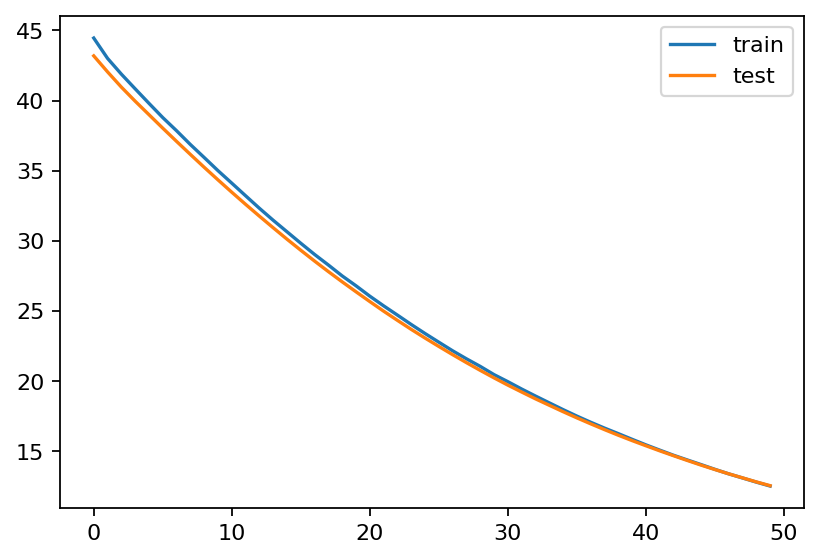

In [ ]:
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values
model = tuner.hypermodel.build(best_params)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)
loss, accuracy = model.evaluate(X_val, y_val) # utilizar un x_test, y_test que no fue utilizado para entrenamiento
print("Validation accuracy:", accuracy)
plt.figure(figsize=(6, 4), dpi=160)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'learning_rate': 1e-05,
 'kernel_regularizer': 0.05,
 'dropout_rate': 0.6,
 'batch_size': 16}

# Best Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
import keras_tuner as kt
import pandas as pd

# Load features
features = np.load("/content/drive/My Drive/Thesis/resulting_array_efficient_net.npy")

# Load labels
label_df = pd.read_csv("/content/drive/My Drive/Thesis/indexToLabel_efficient_net.csv")
labels = label_df["Value"].to_numpy()
# Convert string labels to integers
label_mapping = {label: index for index, label in enumerate(np.unique(labels))}
reverse_label_mapping = {index: label for label, index in label_mapping.items()}
print(label_mapping)
print(reverse_label_mapping)
print(np.unique(labels))
labels = np.array([label_mapping[label] for label in labels])

# One-hot encode the integer labels
num_classes = len(np.unique(labels))
labels = tf.keras.utils.to_categorical(labels, num_classes)

print(labels)
print(labels.shape)
print(features.shape)
print(num_classes)

{'Emergency_Vehicle': 0, 'Explosion': 1, 'Gunshot': 2, 'Other_(Music,Bell,Speech,Silence,Sneeze)': 3, 'Power_Tool': 4}
{0: 'Emergency_Vehicle', 1: 'Explosion', 2: 'Gunshot', 3: 'Other_(Music,Bell,Speech,Silence,Sneeze)', 4: 'Power_Tool'}
['Emergency_Vehicle' 'Explosion' 'Gunshot'
 'Other_(Music,Bell,Speech,Silence,Sneeze)' 'Power_Tool']
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
(4974, 5)
(4974, 2560)
5


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
best_hps = {'learning_rate': 1e-05,
 'kernel_regularizer': 0.05,
 'dropout_rate': 0.6,
 'batch_size': 16}

In [ ]:
model = Sequential()
model.add(Dense(512, activation="relu", kernel_regularizer=L2(best_hps['kernel_regularizer'])))
model.add(BatchNormalization())
model.add(Dropout(best_hps['dropout_rate']))
model.add(Dense(num_classes, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=best_hps['learning_rate'])

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_categorical_accuracy', patience=20, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=best_hps['batch_size'], callbacks=[early_stopping])

Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - categorical_accuracy: 0.3202 - loss: 44.3538 - val_categorical_accuracy: 0.5598 - val_loss: 42.3803
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.4527 - loss: 42.3914 - val_categorical_accuracy: 0.6151 - val_loss: 40.7458
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.5304 - loss: 40.7581 - val_categorical_accuracy: 0.6573 - val_loss: 39.2742
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.5526 - loss: 39.2871 - val_categorical_accuracy: 0.6734 - val_loss: 37.8485
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.5629 - loss: 37.8342 - val_categorical_accuracy: 0.6945 - val_loss: 36.4578
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.6025 - loss: 36.3721 - val_categorical_accuracy: 0.6804 - val_loss: 35.1101
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_ac

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7432 - loss: 12.8397  
Validation accuracy: 0.7547738552093506


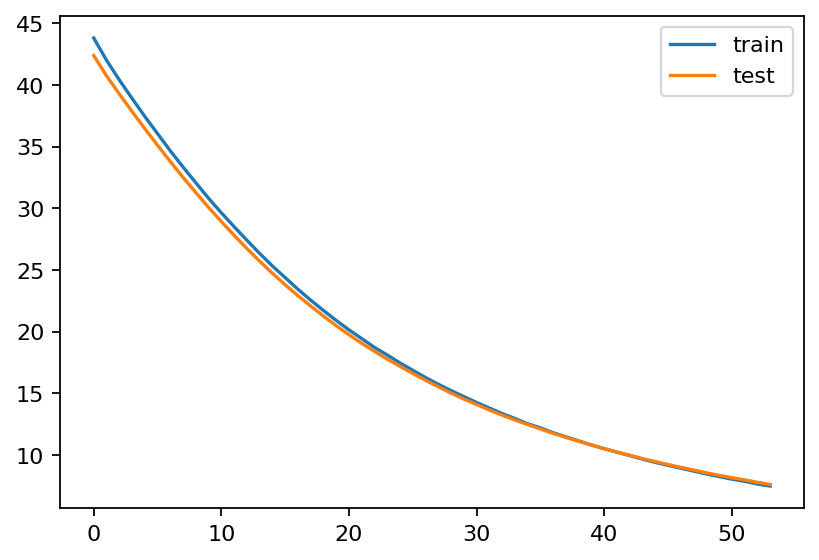

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val) # utilizar un x_test, y_test que no fue utilizado para entrenamiento
print("Validation accuracy:", accuracy)
plt.figure(figsize=(6, 4), dpi=160)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Confusion Matrix:
[[187   7   2   6   8]
 [  7 119  41  20  13]
 [  1  38 125  13  12]
 [  7  14  20 140  13]
 [  4   2   8   8 180]]
ROC-AUC for class Emergency_Vehicle: 0.9724
ROC-AUC for class Explosion: 0.8930
ROC-AUC for class Gunshot: 0.9050
ROC-AUC for class Other_(Music,Bell,Speech,Silence,Sneeze): 0.9211
ROC-AUC for class Power_Tool: 0.9673


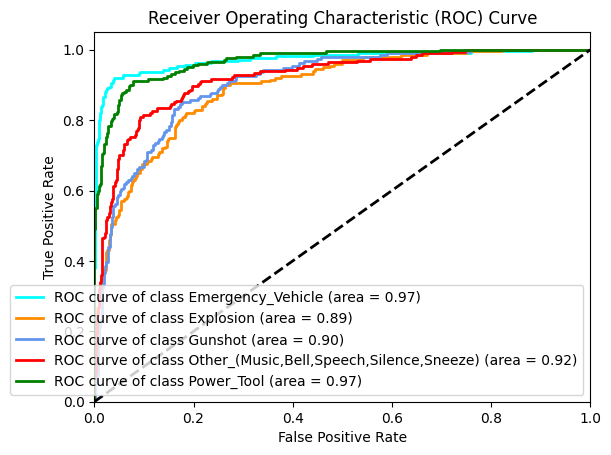

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

# Evaluate model to get predictions
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Compute ROC-AUC for each class
roc_auc = roc_auc_score(y_val, y_val_pred, average=None)
for i, score in enumerate(roc_auc):
    print(f"ROC-AUC for class {reverse_label_mapping[i]}: {score:.4f}")

# Plotting ROC Curves
fpr = {}
tpr = {}
roc_auc_dict = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_val_pred[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {reverse_label_mapping[i]} (area = {roc_auc_dict[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[187   7   2   6   8]
 [  7 119  41  20  13]
 [  1  38 125  13  12]
 [  7  14  20 140  13]
 [  4   2   8   8 180]]
Accuracy for class 'Emergency_Vehicle': 0.8905
Accuracy for class 'Explosion': 0.5950
Accuracy for class 'Gunshot': 0.6614
Accuracy for class 'Other_(Music,Bell,Speech,Silence,Sneeze)': 0.7216
Accuracy for class 'Power_Tool': 0.8911

Classification Report:
                                          precision    recall  f1-score   support

                       Emergency_Vehicle       0.91      0.89      0.90       210
                               Explosion       0.66      0.59      0.63       200
                                 Gunshot       0.64      0.66      0.65       189
Other_(Music,Bell,Speech,Silence,Sneeze)       0.75      0.72      0.73       194
                              Power_Tool       0.80      0.89      0.84       202

                                accuracy                           0.75     

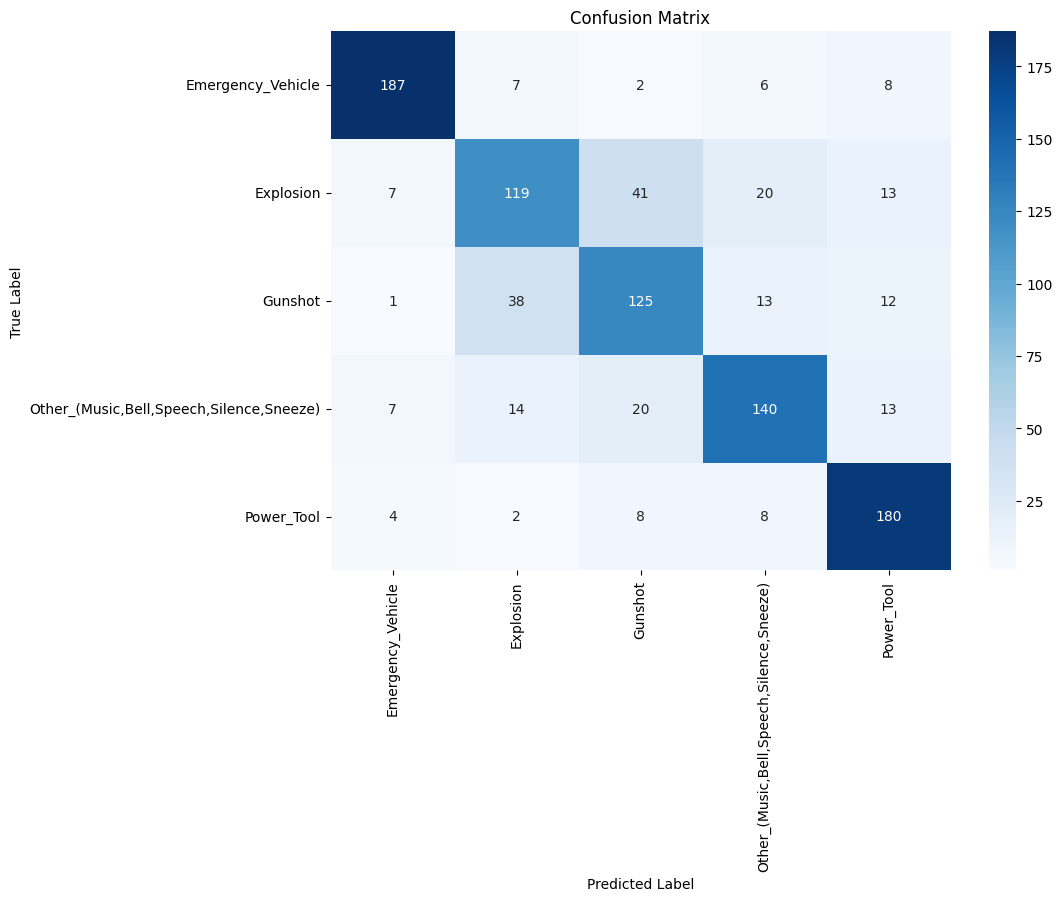

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate model to get predictions
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, get more detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=[reverse_label_mapping[i] for i in range(num_classes)]))

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[reverse_label_mapping[i] for i in range(num_classes)], yticklabels=[reverse_label_mapping[i] for i in range(num_classes)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate model to get predictions
y_val_pred = model.predict(X_val)

# Compute the overall ROC-AUC score
overall_roc_auc = roc_auc_score(y_val, y_val_pred, average='macro')
print(f"Overall ROC-AUC score: {overall_roc_auc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Overall ROC-AUC score: 0.9318
